Going through experimental data collected in lab using different material substrates and coatings 
 used for soft neural interface device
with Ben Rees

--------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
gray = '#758A93'
cream = '#ECD5BC'
yellow = '#E9B63B'
red = '#C66E52'

# all mm
polyimide_li = 19.00
polyimide_w = 5.18
polyimide_t = 15e-3

kirigami_li = 23.79
kirigami_w = 5  # guessing from slide - which one did we use?
kirigami_t = 25.4e-3

pdms_li = 22.38
pdms_w = 5.6
pdms_t = 1024.5e-3

kirigami_lf = 4838e-3
polyimide_lf = 53.8e-3
pdms_lf = 3588.7e-3



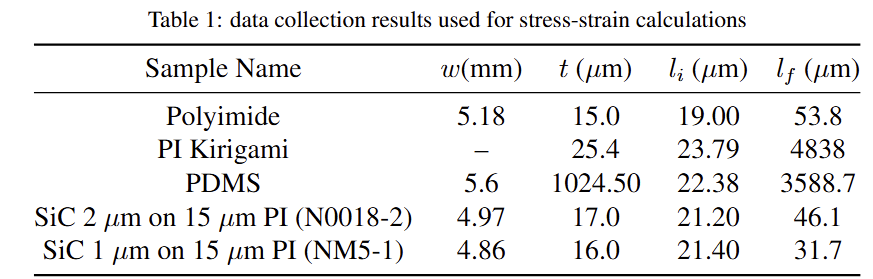

1. Test bulk substrates (PI, silicone, kirigami PI). Plot engineering stress–strain curves to failure at a
fixed displacement rate and compare mechanical properties. Include elongation limit, elastic modulus,
tensile strength, and toughness.

$\epsilon = \frac{\Delta L}{L_0} = \frac{extension - original}{original}$


$\sigma = \frac{F}{A_0} = \frac{force}{original cross-sectional area}$

In [2]:
kirigami_data = pd.read_excel('data/kirigami.xlsx', sheet_name='cleaned')
polyimide_data = pd.read_excel('data/polyimide.xlsx', sheet_name='cleaned')
pdms_data = pd.read_excel('data/PDMS.xlsx', sheet_name='cleaned')

In [5]:
kirigami_data['strain'] = (kirigami_data['extension']) / kirigami_li
kirigami_data['stress'] = kirigami_data['force'] / (kirigami_w * kirigami_t)

polyimide_data['strain'] = (polyimide_data['extension']) / polyimide_li
polyimide_data['stress'] = polyimide_data['force'] / (polyimide_w * polyimide_t)

pdms_data['strain'] = (pdms_data['extension']) / pdms_li
pdms_data['stress'] = pdms_data['force'] / (pdms_w * pdms_t)

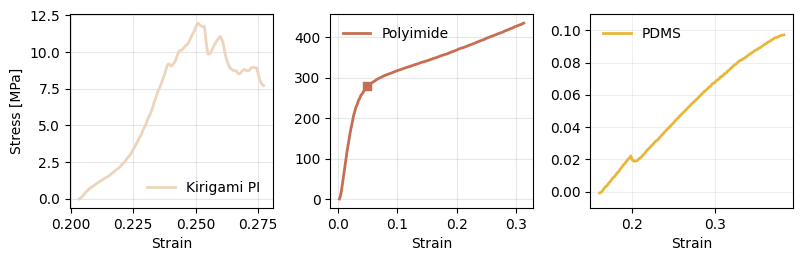

In [ ]:
# plot stress vs strain, all three
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8, 8/3))

ax1.plot(kirigami_data['strain'][:-150], kirigami_data['stress'][:-150],
          color = cream, linewidth=2, label='Kirigami PI')
ax1.set_xlabel('Strain')
ax1.set_ylabel('Stress [MPa]')
ax1.grid(True, alpha=0.3)
ax1.legend(frameon=False)

ax2.plot(polyimide_data['strain'][:-30], polyimide_data['stress'][:-30],
          color = red, linewidth=2, label='Polyimide')
ax2.set_xlabel('Strain')
ax2.grid(True, alpha=0.3)
ax2.scatter([0.05], [280], color = red, marker='s') # to mark yield point
ax2.legend(frameon=False)

ax3.plot(pdms_data['strain'][:-65], pdms_data['stress'][:-65],
          color = yellow, linewidth=2, label='PDMS')
ax3.set_xlabel('Strain')
ax3.set_ylim(-0.01, 0.11)
ax3.grid(True, alpha=0.2)
ax3.legend(frameon=False)
plt.tight_layout()
# fig.savefig('figs/stress_strain.png', dpi=300)


modulus of elasticity, toughness, tensile strength, elongation at break

In [ ]:
pdms_strain_limit = 0.35
kirigimi_strain_limit = 0.25
polyimide_strain_limit = 0.05

pdms_linear_mask = pdms_data['strain'] <= pdms_strain_limit
pdms_slope, _ = np.polyfit(pdms_data['strain'][pdms_linear_mask], pdms_data['stress'][pdms_linear_mask], 1)
pdms_modulus = pdms_slope

kirigami_linear_mask = kirigami_data['strain'] <= kirigimi_strain_limit
kirigami_slope, _ = np.polyfit(kirigami_data['strain'][kirigami_linear_mask], kirigami_data['stress'][kirigami_linear_mask], 1)
kirigami_modulus = kirigami_slope

polyimide_linear_mask = polyimide_data['strain'] <= polyimide_strain_limit
polyimide_slope, _ = np.polyfit(polyimide_data['strain'][polyimide_linear_mask], polyimide_data['stress'][polyimide_linear_mask], 1)
polyimide_modulus = polyimide_slope

PDMS Modulus: 0.48 MPa
Kirigami PI Modulus: 264.42 MPa
Polyimide Modulus: 6324.00 MPa


In [ ]:
pdms_tensile_strength = pdms_data['stress'].max()
kirigami_tensile_strength = kirigami_data['stress'].max()
polyimide_tensile_strength = polyimide_data['stress'].max()

# the area under the stress-strain curve
pdms_toughness = np.trapezoid(pdms_data['stress'], x=pdms_data['strain'])
kirigami_toughness = np.trapezoid(kirigami_data['stress'], x=kirigami_data['strain'])
polyimide_toughness = np.trapezoid(polyimide_data['stress'], x=polyimide_data['strain'])

pdms_elongation_limit = pdms_data['strain'].max() * 100
kirigami_elongation_limit = kirigami_data['strain'].max() * 100
polyimide_elongation_limit = polyimide_data['strain'].max() * 100

print(f'PDMS Modulus: {pdms_modulus:.2f} MPa')
print(f'Kirigami PI Modulus: {kirigami_modulus:.2f} MPa')
print(f'Polyimide Modulus: {polyimide_modulus:.2f} MPa')
print()
print("Elongation Limit at Break")
print(f"PDMS: {pdms_elongation_limit:.1f}%")
print(f"Kirigami PI: {kirigami_elongation_limit:.1f}%")
print(f"Polyimide: {polyimide_elongation_limit:.1f}%")
print()
print("Tensile Strength")
print(f"PDMS: {pdms_tensile_strength:.3f} MPa")
print(f"Kirigami PI: {kirigami_tensile_strength:.2f} MPa")
print(f"Polyimide: {polyimide_tensile_strength:.2f} MPa")
print()
print("Toughness (Energy to Break)")
print(f"PDMS: {pdms_toughness:.3f} MJ/m^3")
print(f"Kirigami PI: {kirigami_toughness:.3f} MJ/m^3")
print(f"Polyimide: {polyimide_toughness:.3f} MJ/m^3")

Elongation Limit at Break
PDMS: 50.0%
Kirigami PI: 40.3%
Polyimide: 37.6%

Tensile Strength
PDMS: 0.097 MPa
Kirigami PI: 11.98 MPa
Polyimide: 456.18 MPa

Toughness (Energy to Break)
PDMS: 0.012 MJ/m^3
Kirigami PI: 0.572 MJ/m^3
Polyimide: 119.592 MJ/m^3


2. Test bilayer films (SiC on PI). Compare the stress–strain behavior to that of the bulk PI substrate. Estimate the coating (SiC) modulus and compare it with literature values for the encapsulation material. If errors occur in extracting the coating modulus, briefly explain likely causes.

In [29]:
SiC_1um = pd.read_excel('data/SiC/1um.xlsx', sheet_name='cleaned')
SiC_2um = pd.read_excel('data/SiC/2um.xlsx', sheet_name='cleaned')
# given dimensions in mm
SiC_2um_w = 4.86
SiC_2um_t = 17e-3
SiC_2um_li = 22.2
SiC_2um_lf = 46.1e-3

SiC_1um_w = 4.86
SiC_1um_t = 16e-3
SiC_1um_li = 21.4
SiC_1um_lf = 31.7e-3

In [30]:
SiC_1um['strain'] = (SiC_1um['extension']) / SiC_1um_li
SiC_1um['stress'] = SiC_1um['force'] / (SiC_1um_w * SiC_1um_t)
SiC_2um['strain'] = (SiC_2um['extension']) / SiC_2um_li
SiC_2um['stress'] = SiC_2um['force'] / (SiC_2um_w * SiC_2um_t)

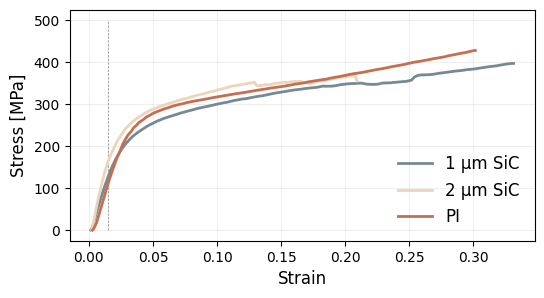

In [58]:
end = -35
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(SiC_1um['strain'][:end], SiC_1um['stress'][:end],
          color = gray, linewidth=2, label='1 µm SiC')
ax.plot(SiC_2um['strain'][:end], SiC_2um['stress'][:end],
          color = cream, linewidth=2, label='2 µm SiC')
ax.plot(polyimide_data['strain'][:end], polyimide_data['stress'][:end],
          color = red, linewidth=2, label='PI')
ax.set_xlabel('Strain', fontsize=12)
ax.set_ylabel('Stress [MPa]', fontsize=12)
ax.grid(True, alpha=0.2)
ax.plot([0.015, 0.015], [0, 500], color='black', linestyle = '--', alpha = 0.5, linewidth = 0.5, zorder=-1)  # yield point
ax.legend(frameon=False, ncols=1, fontsize=12)
# fig.savefig('figs/sic_stress_strain.png', dpi=300)

modulus calculation

In [54]:
PI_strain_limit = 0.015
PI_linear_mask = polyimide_data['strain'] <= PI_strain_limit
PI_slope, _ = np.polyfit(polyimide_data['strain'][PI_linear_mask], polyimide_data['stress'][PI_linear_mask], 1)

SiC_1um_linear_mask = SiC_1um['strain'] <= PI_strain_limit
SiC_1um_slope, _ = np.polyfit(SiC_1um['strain'][SiC_1um_linear_mask], SiC_1um['stress'][SiC_1um_linear_mask], 1)

SiC_2um_linear_mask = SiC_2um['strain'] <= PI_strain_limit
SiC_2um_slope, _ = np.polyfit(SiC_2um['strain'][SiC_2um_linear_mask], SiC_2um['stress'][SiC_2um_linear_mask], 1)

print(f'PI Modulus: {PI_slope:.2f} MPa')
print(f'1 µm SiC Modulus: {SiC_1um_slope:.2f} MPa')
print(f'2 µm SiC Modulus: {SiC_2um_slope:.2f} MPa')

PI Modulus: 9242.68 MPa
1 µm SiC Modulus: 9857.53 MPa
2 µm SiC Modulus: 13110.89 MPa


3. Cracking analysis from recordings (SiC on PI): Include image arrays from the recording files at 0% strain and Stages I, II, III. Calculate and report crack-onset strain, εc, critical energy release rate, Gc, crack density at saturation CDsat, critical stress-transfer length lc, and interfacial shear strength (IFSS). Compare the adhesion level with other film-substrate interface materials.

4. Nanocomposite comparison [no test; please use files provided]: Review the recordings for MMT nanoclay-PVA nanocomposites on PET. Describe how their crack evolution differs from SiC on PI. Show Stages I–III. If the stages are not clearly distinguishable, discuss possible reasons.